In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import label_binarize
import joblib

In [83]:
#Lê o arquivo quando já feito o upload no google colab
df = pd.read_csv('ObesityDataSet.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [84]:
# Renomeando as colunas em pt br
df.rename(columns={'Gender': 'genero'}, inplace=True)
df.rename(columns={'Age': 'idade'}, inplace=True)
df.rename(columns={'Height': 'altura'}, inplace=True)
df.rename(columns={'Weight': 'peso'}, inplace=True)
df.rename(columns={'family_history_with_overweight': 'historico_familiar_sobrepeso'}, inplace=True)
df.rename(columns={'FAVC': 'consumo_freq_alimentos_altamente_caloricos'}, inplace=True)
df.rename(columns={'FCVC': 'consumo_freq_vegetais'}, inplace=True)
df.rename(columns={'NCP': 'qtd_refeicoes_principais'}, inplace=True)
df.rename(columns={'CAEC': 'consumo_alimentos_entre_ref'}, inplace=True)
df.rename(columns={'SMOKE': 'fumante'}, inplace=True)
df.rename(columns={'CH2O': 'consumo_agua'}, inplace=True)
df.rename(columns={'SCC': 'monitoramento_consumo_calorias'}, inplace=True)
df.rename(columns={'FAF': 'freq_atividade_fisica'}, inplace=True)
df.rename(columns={'TUE': 'tempo_consumo_disp_tecnologia'}, inplace=True)
df.rename(columns={'CALC': 'consumo_alcool'}, inplace=True)
df.rename(columns={'MTRANS': 'transporte_utilizado'}, inplace=True)
df.rename(columns={'NObeyesdad': 'nivel_obesidade'}, inplace=True)
df.rename(columns={'CH2O': 'consumo_agua'}, inplace=True)

# Dicionário para atualizar as variaveis em pt br
ptbr = {
    'Male': 'Masculino',
    'Female': 'Feminino',
}

# Atualizando os valores para portugues
df['genero'] = df['genero'].replace(ptbr)

# Transformando variáveis categóricas em numéricas (One-Hot Encoding)
df = pd.get_dummies(df, columns=['genero'])

# Nome das colunas a serem movidas
colunas_a_mover = ['genero_Masculino', 'genero_Feminino']

# Nome da coluna após a qual você quer posicionar as colunas
coluna_referencia = 'idade'

# Obter a posição da coluna de referência
posicao = df.columns.get_loc(coluna_referencia) + 1  # +1 para colocar logo após a coluna de referência

# Criar a nova ordem das colunas
nova_ordem = (
    list(df.columns[:posicao]) +  # Todas as colunas até a posição de referência
    colunas_a_mover +             # As colunas que queremos mover
    [col for col in df.columns if col not in colunas_a_mover and col not in df.columns[:posicao]]  # Restantes
)

# Reorganizar o DataFrame
df = df[nova_ordem]

# Dicionário para atualizar as variaveis em pt br
ptbr = {
    'yes': 'Sim',
    'no': 'Nao',
}

# Atualizando os valores para portugues
df['historico_familiar_sobrepeso'] = df['historico_familiar_sobrepeso'].replace(ptbr)

# Atualizando os valores para 1 e 0
df['historico_familiar_sobrepeso'] = df['historico_familiar_sobrepeso'].replace({'Sim': 1, 'Nao': 0})

# Dicionário para atualizar as variaveis em pt br
ptbr = {
    'yes': 'Sim',
    'no': 'Nao',
}

# Atualizando os valores para portugues
df['consumo_freq_alimentos_altamente_caloricos'] = df['consumo_freq_alimentos_altamente_caloricos'].replace(ptbr)

# Atualizando os valores para 1 e 0
df['consumo_freq_alimentos_altamente_caloricos'] = df['consumo_freq_alimentos_altamente_caloricos'].replace({'Sim': 1, 'Nao': 0})

# Dicionário para atualizar as variaveis em pt br
ptbr = {
    'Sometimes': 'as vezes',
    'Frequently': 'frequentemente',
    'Always': 'sempre',
    'no': 'nao',
}

# Atualizando os valores para portugues
df['consumo_alimentos_entre_ref'] = df['consumo_alimentos_entre_ref'].replace(ptbr)

# Dicionário de mapeamento para codificação ordinal
ordem_map = {
    'nao': 0,
    'as vezes': 1,
    'frequentemente': 2,
    'sempre': 3
}

# Atualizando a coluna
df['consumo_alimentos_entre_ref'] = df['consumo_alimentos_entre_ref'].replace(ordem_map)

# Dicionário para atualizar as variaveis em pt br
ptbr = {
    'no': 'nao',
    'yes': 'sim',
}

# Atualizando os valores para portugues
df['fumante'] = df['fumante'].replace(ptbr)

# Atualizando os valores para 1 e 0
df['fumante'] = df['fumante'].replace({'sim': 1, 'nao': 0})

# Dicionário para atualizar as variaveis em pt br
ptbr = {
    'no': 'nao',
    'yes': 'sim',
}

# Atualizando os valores para portugues
df['monitoramento_consumo_calorias'] = df['monitoramento_consumo_calorias'].replace(ptbr)

# Atualizando os valores para 1 e 0
df['monitoramento_consumo_calorias'] = df['monitoramento_consumo_calorias'].replace({'sim': 1, 'nao': 0})

# Dicionário para atualizar as variaveis em pt br
ptbr = {
    'Sometimes': 'as vezes',
    'no': 'nao',
    'Frequently': 'frequentemente',
    'Always': 'sempre',
}

# Atualizando os valores para portugues
df['consumo_alcool'] = df['consumo_alcool'].replace(ptbr)

# Dicionário de mapeamento para codificação ordinal
ordem_map = {
    'nao': 0,
    'as vezes': 1,
    'frequentemente': 2,
    'sempre': 3
}

# Atualizando a coluna
df['consumo_alcool'] = df['consumo_alcool'].replace(ordem_map)

# Dicionário para atualizar as variaveis em pt br
ptbr = {
    'Public_Transportation': 'transporte publico',
    'Automobile': 'veiculo',
    'Walking': 'andando',
    'Motorbike': 'moto',
    'bike': 'bicicleta',
}

# Atualizando os valores para portugues
df['transporte_utilizado'] = df['transporte_utilizado'].replace(ptbr)

# Executar só uma vez, visto que depois de executado, a coluna 'transporte_utilizado' não existe mais.
# Aplicando One-Hot Encoding
df = pd.get_dummies(df, columns=['transporte_utilizado'], drop_first=True)

# Dicionário para atualizar as variaveis em pt br
nivel_obesidade_ptbr = {
    'Obesity_Type_I': 'Obesidade Tipo I',
    'Obesity_Type_II': 'Obesidade Tipo II',
    'Obesity_Type_III': 'Obesidade Tipo III',
    'Overweight_Level_I': 'Excesso de Peso Nível I',
    'Overweight_Level_II': 'Excesso de Peso Nível II',
    'Normal_Weight': 'Peso Normal',
    'Insufficient_Weight': 'Baixo Peso'
}

# Substituir valores na coluna específica (por exemplo, 'nivel_obesidade')
df['nivel_obesidade'] = df['nivel_obesidade'].replace(nivel_obesidade_ptbr)

# Dicionário para a codificação ordinal
nivel_obesidade_ordinal = {
    'Baixo Peso': 0,
    'Peso Normal': 1,
    'Excesso de Peso Nível I': 2,
    'Excesso de Peso Nível II': 3,
    'Obesidade Tipo I': 4,
    'Obesidade Tipo II': 5,
    'Obesidade Tipo III': 6
}

# Substituindo as categorias textuais pelos valores numéricos
df['nivel_obesidade'] = df['nivel_obesidade'].replace(nivel_obesidade_ordinal)

# Lista de colunas sem 'nivel_obesidade'
colunas = [col for col in df.columns if col != 'nivel_obesidade']

# Adicionando 'nivel_obesidade' ao final da lista de colunas
colunas.append('nivel_obesidade')

# Reordenando o DataFrame com as colunas na nova ordem
df = df[colunas]

# Verificando as primeiras linhas do DataFrame para garantir que a coluna foi movida
df.head()


C:\Users\João P\AppData\Local\Temp\ipykernel_7764\116011485.py:62: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['historico_familiar_sobrepeso'] = df['historico_familiar_sobrepeso'].replace({'Sim': 1, 'Nao': 0})
C:\Users\João P\AppData\Local\Temp\ipykernel_7764\116011485.py:74: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['consumo_freq_alimentos_altamente_caloricos'] = df['consumo_freq_alimentos_altamente_caloricos'].replace({'Sim': 1, 'Nao': 0})
C:\Users\João P\AppData\Local\Temp\ipykernel_7764\116011485.py:96: FutureWarni

,idade,genero_Masculino,genero_Feminino,altura,peso,historico_familiar_sobrepeso,consumo_freq_alimentos_altamente_caloricos,consumo_freq_vegetais,qtd_refeicoes_principais,consumo_alimentos_entre_ref,...,consumo_agua,monitoramento_consumo_calorias,freq_atividade_fisica,tempo_consumo_disp_tecnologia,consumo_alcool,transporte_utilizado_andando,transporte_utilizado_moto,transporte_utilizado_transporte publico,transporte_utilizado_veiculo,nivel_obesidade
0,21.0,False,True,1.62,64.0,1,0,2.0,3.0,1,...,2.0,0,0.0,1.0,0,False,False,True,False,1
1,21.0,False,True,1.52,56.0,1,0,3.0,3.0,1,...,3.0,1,3.0,0.0,1,False,False,True,False,1
2,23.0,True,False,1.80,77.0,1,0,2.0,3.0,1,...,2.0,0,2.0,1.0,2,False,False,True,False,1
3,27.0,True,False,1.80,87.0,0,0,3.0,3.0,1,...,2.0,0,2.0,0.0,2,True,False,False,False,2
4,22.0,True,False,1.78,89.8,0,0,2.0,1.0,1,...,2.0,0,0.0,0.0,1,False,False,True,False,3


In [85]:
data = df.copy()

In [86]:
# Função para visualização de distribuição de classes e correlação
def plot_class_distribution_and_correlation(data, title):
    plt.figure(figsize=(5, 4))
    sns.countplot(x='nivel_obesidade', data=data)
    plt.title(f'Distribuição da Classe - {title}')
    plt.show()

    plt.figure(figsize=(10, 8))
    correlation = data.corr()
    sns.heatmap(correlation, cmap="coolwarm", annot=False, fmt='.2f')
    plt.title(f"Mapa de Correlação das Variáveis - {title}")
    plt.show()

In [87]:
# Função para comparar os efeitos do balanceamento e gerar um gráfico comparativo
def compare_balancing_effects(X, y):
    results = {}

    # SMOTE
    smote = SMOTE(random_state=2239)
    X_res, y_res = smote.fit_resample(X, y)
    data_resampled_smote = pd.DataFrame(X_res, columns=X.columns)
    data_resampled_smote['nivel_obesidade'] = y_res  # Incluir a coluna target
    plot_class_distribution_and_correlation(data_resampled_smote, "Após SMOTE")
    roc_auc, f1_score_minor = evaluate_model(X_res, y_res, "SMOTE")
    results["SMOTE"] = {"AUC-ROC": roc_auc, "F1-score Minor Class": f1_score_minor}

# Gráfico Comparativo dos Resultados
    methods = list(results.keys())
    auc_scores = [results[method]["AUC-ROC"] for method in methods]
    f1_scores = [results[method]["F1-score Minor Class"] for method in methods]

    plt.figure(figsize=(10, 6))
    x = range(len(methods))
    plt.bar([p - 0.2 for p in x], auc_scores, width=0.4, label='AUC-ROC', align='center')
    plt.bar([p + 0.2 for p in x], f1_scores, width=0.4, label='F1-score Minor Class', align='center')
    plt.xticks(x, methods)
    plt.xlabel("Método de Balanceamento")
    plt.ylabel("Pontuação")
    plt.title("Comparação dos Métodos de Balanceamento (AUC-ROC e F1-score)")
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))  # Posicionar a legenda fora do gráfico
    plt.tight_layout()  # Ajustar o layout para evitar cortes
    plt.show()

    return results

def evaluate_model(X, y, balance_method, seed=2239):
    # Divisão dos dados em treino e teste (30% para teste)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

    # Modelo com hiperparâmetros ajustados
    model = LogisticRegression(
        max_iter=1000,
        multi_class='multinomial',
        solver='lbfgs',
        penalty='l2',
        C=0.5,
        class_weight='balanced',
        tol=1e-4
    )
    # Ajuste do modelo
    model.fit(X_train, y_train)

    # Verificando a importância das variáveis (coeficientes)
    coef = model.coef_[0]  # Coeficientes para o modelo multiclasse
    variables = X_train.columns  # Nomes das variáveis (features)

    # Criar DataFrame para visualizar os coeficientes
    coef_df = pd.DataFrame({
        'Variable': variables,
        'Coefficient': coef,
        'Abs Coefficient': np.abs(coef)
    })
    # Ordenar por valor absoluto dos coeficientes para visualizar as variáveis mais importantes
    coef_df = coef_df.sort_values(by='Abs Coefficient', ascending=False)

    # Exibir as variáveis ordenadas
    print("Importância das variáveis (coeficientes):")
    print(coef_df)

    # Predição e Probabilidades
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nMétricas para {balance_method} - Seed {seed}")
    print("Matriz de Confusão:")
    print(cm)

    # Gráfico da Matriz de Confusão
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=list(map(str, y.unique())), yticklabels=list(map(str, y.unique())))
    plt.xlabel("Predição")
    plt.ylabel("Valor Real")
    plt.title(f"Matriz de Confusão - Regressão Logística")
    plt.show()

    # Relatório de Classificação
    print("Relatório de Classificação:")
    report = classification_report(y_test, y_pred, target_names=list(map(str, y.unique())))
    print(report)

    # AUC-ROC
    roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
    print("AUC-ROC (Macro):", roc_auc)

    # Curva ROC
    plt.figure()
    for i in range(len(y.unique())):
        fpr, tpr, thresholds = roc_curve(y_test == i, y_proba[:, i])
        plt.plot(fpr, tpr, label="Classe {} (AUC = {:.2f})".format(str(y.unique()[i]), roc_auc_score(y_test == i, y_proba[:, i])))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("Taxa de Falsos Positivos")
    plt.ylabel("Taxa de Verdadeiros Positivos")
    plt.title(f"Curva ROC - {balance_method}")
    plt.legend(loc="lower right")
    plt.show()

    # F1-score da classe minoritária (assumindo que é a menor label numérica)
    minor_class = min(y.unique())
    f1_score_minor = classification_report(y_test, y_pred, output_dict=True)[str(minor_class)]["f1-score"]

    # Armazena o modelo em um arquivo .pkl
    joblib.dump(model, 'logistic_regression_model.pkl')

    return roc_auc, f1_score_minor

In [88]:
# Preparar variáveis independentes e dependentes
X = data.drop('nivel_obesidade', axis=1)
y = data['nivel_obesidade']

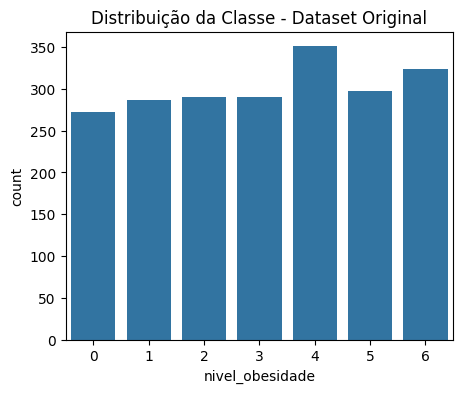

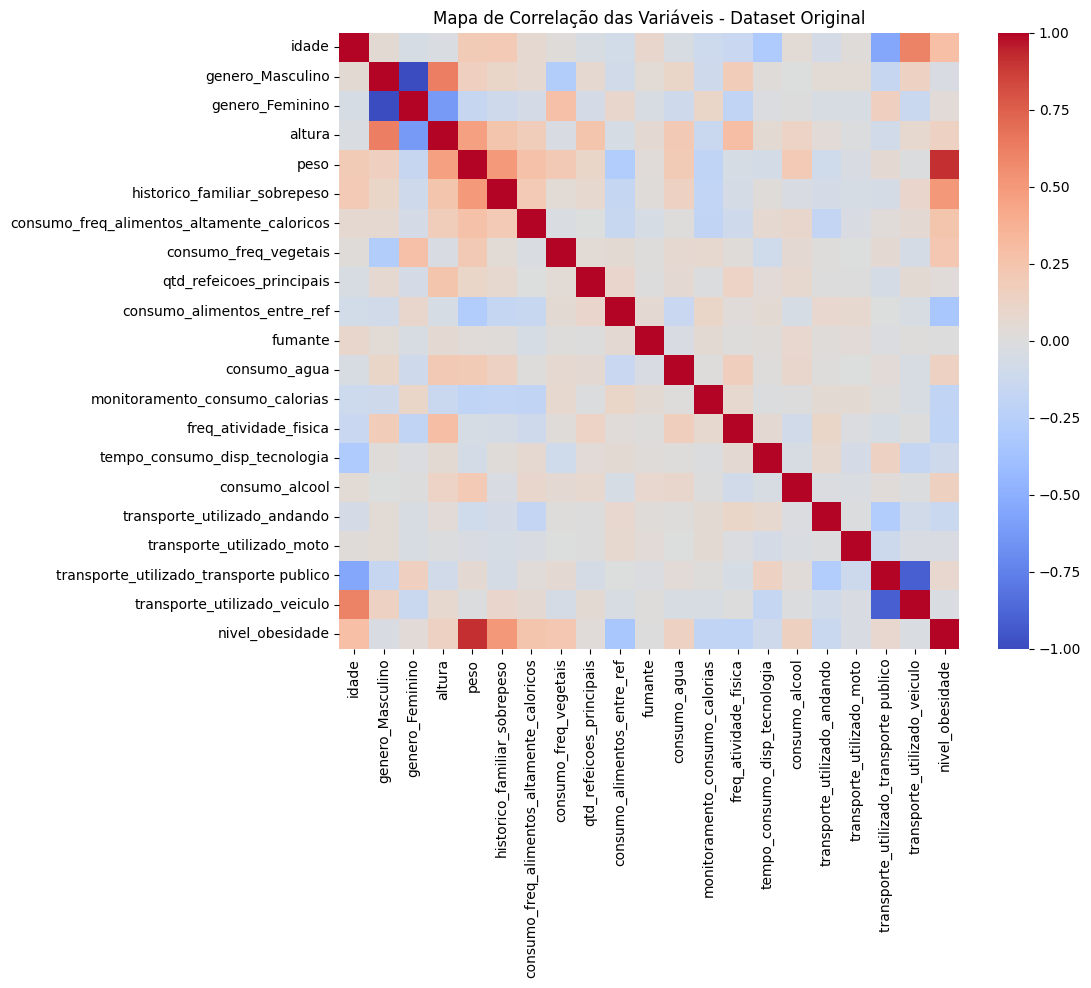

In [89]:
# Carregar dados e verificar distribuição original
plot_class_distribution_and_correlation(data, "Dataset Original")

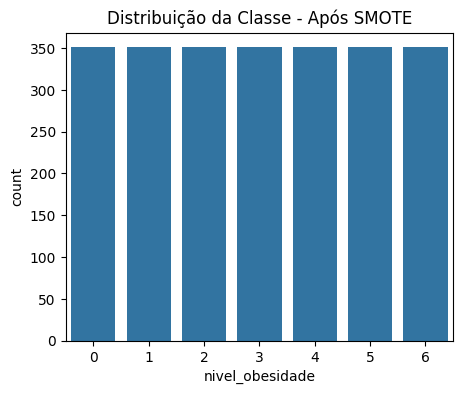

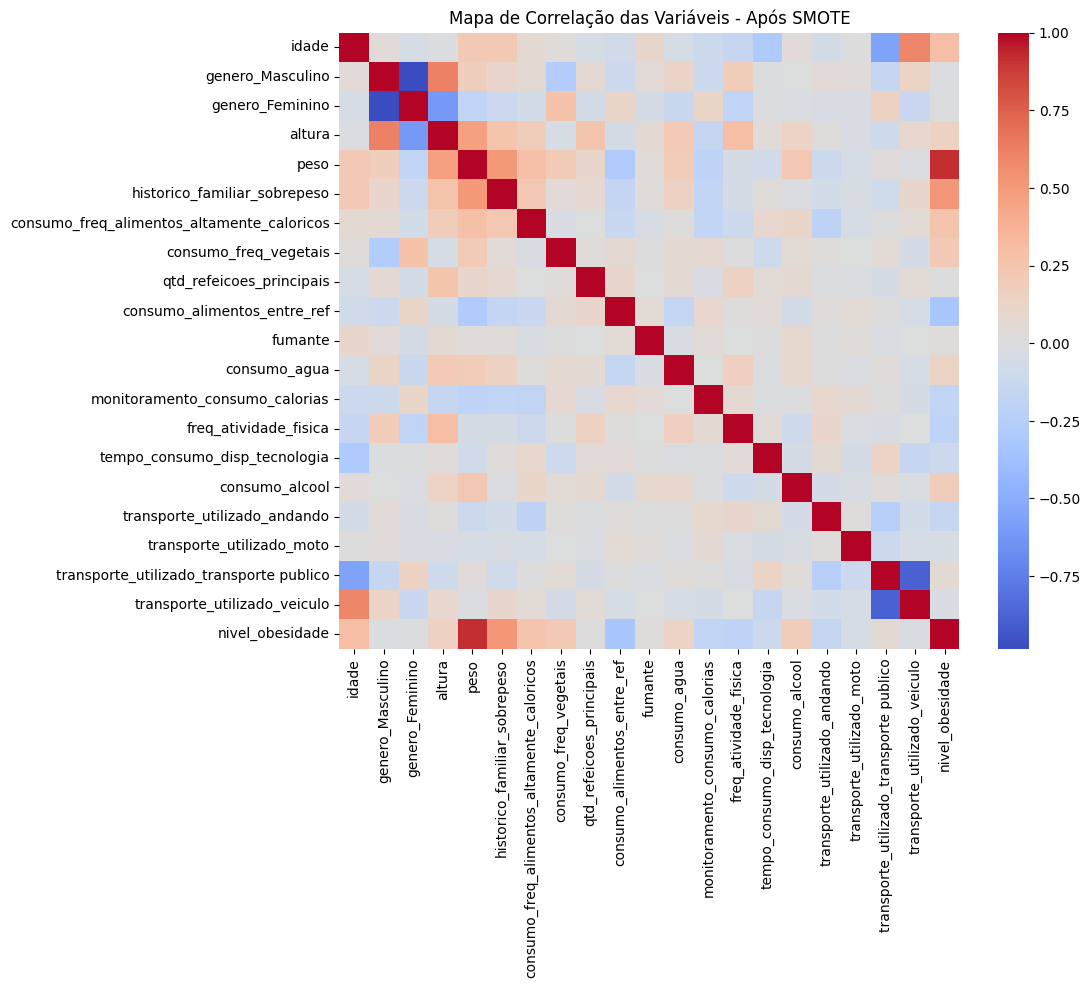

c:\Users\João P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Importância das variáveis (coeficientes):
                                      Variable  Coefficient  Abs Coefficient
3                                       altura     5.890601         5.890601
1                             genero_Masculino     2.098968         2.098968
7                        consumo_freq_vegetais     1.618540         1.618540
9                  consumo_alimentos_entre_ref     1.310029         1.310029
11                                consumo_agua     0.992720         0.992720
18     transporte_utilizado_transporte publico     0.988529         0.988529
8                     qtd_refeicoes_principais     0.859085         0.859085
6   consumo_freq_alimentos_altamente_caloricos     0.835862         0.835862
10                                     fumante    -0.821590         0.821590
14               tempo_consumo_disp_tecnologia     0.573815         0.573815
16                transporte_utilizado_andando     0.528968         0.528968
13                       freq_ativ

c:\Users\João P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


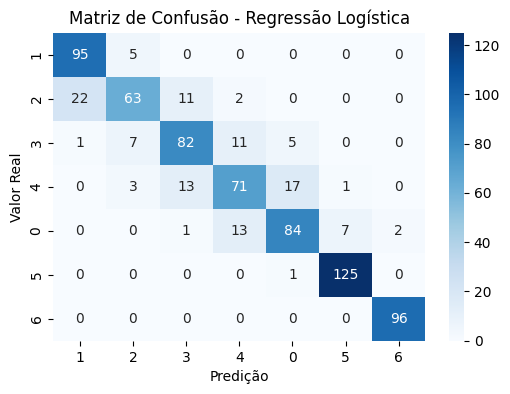

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.81      0.95      0.87       100
           2       0.81      0.64      0.72        98
           3       0.77      0.77      0.77       106
           4       0.73      0.68      0.70       105
           0       0.79      0.79      0.79       107
           5       0.94      0.99      0.97       126
           6       0.98      1.00      0.99        96

    accuracy                           0.83       738
   macro avg       0.83      0.83      0.83       738
weighted avg       0.83      0.83      0.83       738

AUC-ROC (Macro): 0.9744138089726307


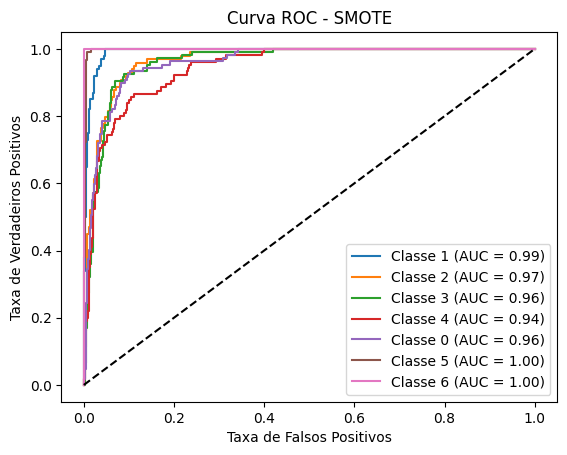

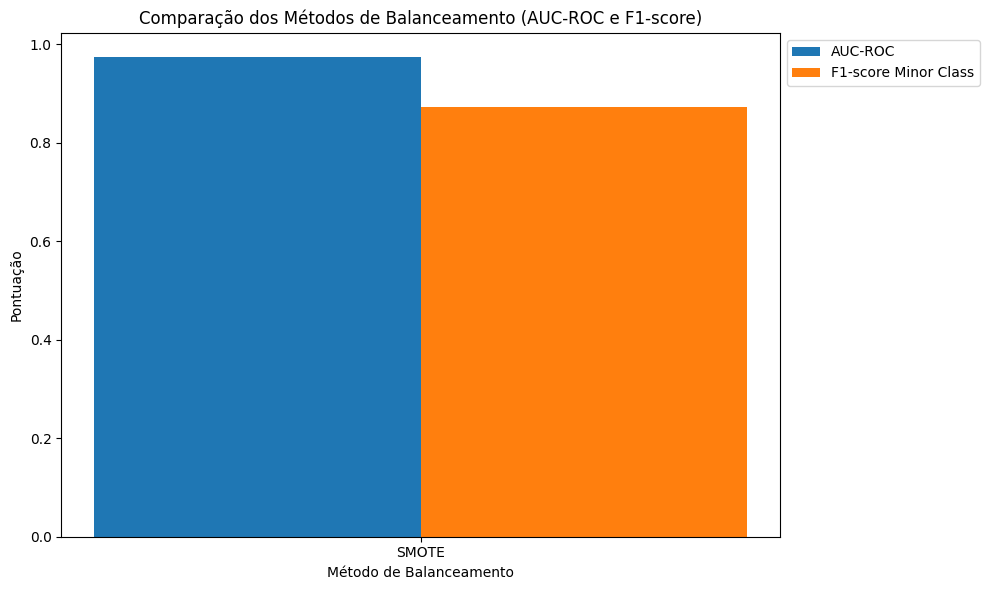

{'SMOTE': {'AUC-ROC': np.float64(0.9744138089726307),
  'F1-score Minor Class': 0.8715596330275229}}

In [90]:
compare_balancing_effects(X, y)


Importância das variáveis:
                                       Feature  Importance
4                                         peso    0.470551
3                                       altura    0.224967
2                              genero_Feminino    0.150759
0                                        idade    0.049977
15                              consumo_alcool    0.021259
6   consumo_freq_alimentos_altamente_caloricos    0.019091
9                  consumo_alimentos_entre_ref    0.016625
14               tempo_consumo_disp_tecnologia    0.012843
8                     qtd_refeicoes_principais    0.010510
7                        consumo_freq_vegetais    0.010181
13                       freq_atividade_fisica    0.003133
5                 historico_familiar_sobrepeso    0.002851
1                             genero_Masculino    0.001358
11                                consumo_agua    0.001304
16                transporte_utilizado_andando    0.001304
10                          

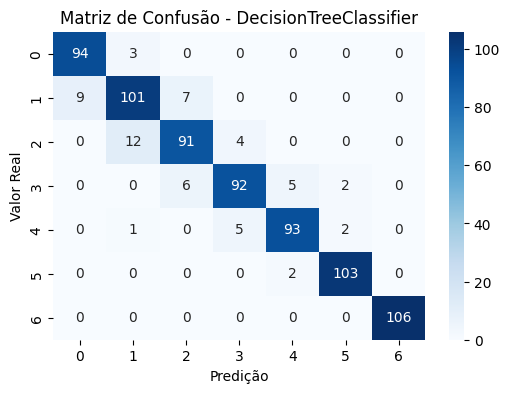

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        97
           1       0.86      0.86      0.86       117
           2       0.88      0.85      0.86       107
           3       0.91      0.88      0.89       105
           4       0.93      0.92      0.93       101
           5       0.96      0.98      0.97       105
           6       1.00      1.00      1.00       106

    accuracy                           0.92       738
   macro avg       0.92      0.92      0.92       738
weighted avg       0.92      0.92      0.92       738

AUC-ROC: 0.9549134602015806


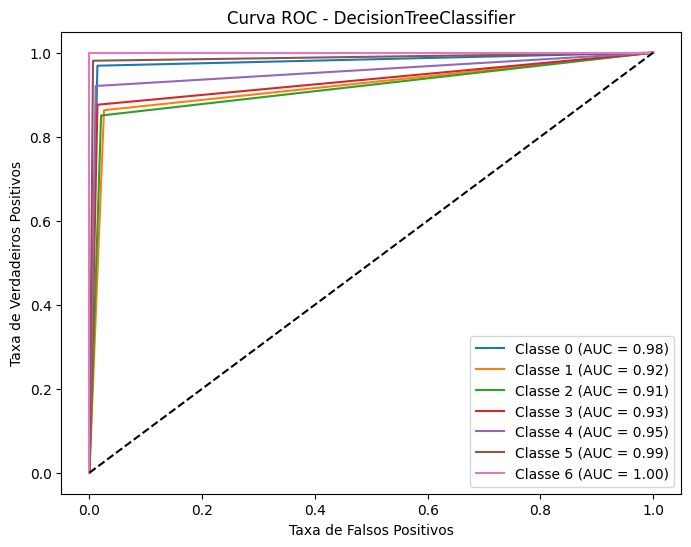


Resultados do Modelo de Árvore de Decisão:
AUC-ROC: 0.9549
F1-score Minor Class: 0.9400


In [91]:
# Função de Avaliação do Modelo Árvore de Decisão 
def evaluate_model_decision_tree(X, y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model.fit(X_train, y_train)

    # Importância das Variáveis
    if hasattr(model, "feature_importances_"):
        feature_importances = pd.DataFrame({
            "Feature": X_train.columns,
            "Importance": model.feature_importances_
        }).sort_values(by="Importance", ascending=False)
        print("\nImportância das variáveis:")
        print(feature_importances)

    # Predição e Probabilidades
    y_pred = model.predict(X_test)

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
        if y_proba.shape[1] == 2:  # Para problemas binários
            y_proba = y_proba[:, 1]
        elif y_proba.shape[1] == 1:
            y_proba = y_proba.ravel()
    else:
        y_proba = y_pred  # Para modelos sem predict_proba

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nMétricas para {type(model).__name__}")
    print("Matriz de Confusão:")
    print(cm)

    # Gráfico da Matriz de Confusão
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=list(map(str, sorted(y.unique()))),
                yticklabels=list(map(str, sorted(y.unique()))))
    plt.xlabel("Predição")
    plt.ylabel("Valor Real")
    plt.title(f"Matriz de Confusão - {type(model).__name__}")
    plt.show()

    # Relatório de Classificação
    print("Relatório de Classificação:")
    report = classification_report(y_test, y_pred, output_dict=True)
    print(classification_report(y_test, y_pred))

    # AUC-ROC
    try:
        if len(y.unique()) > 2:
            roc_auc = roc_auc_score(y_test, y_proba, multi_class="ovr", average="macro")
        else:
            roc_auc = roc_auc_score(y_test, y_proba)
        print("AUC-ROC:", roc_auc)
    except ValueError as e:
        print("Erro no cálculo do AUC-ROC:", e)
        roc_auc = None

    # Curva ROC
    if roc_auc is not None and len(y.unique()) <= 2:
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f"Classe Positiva (AUC = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel("Taxa de Falsos Positivos")
        plt.ylabel("Taxa de Verdadeiros Positivos")
        plt.title(f"Curva ROC - DecisionTreeClassifier")
        plt.legend(loc="lower right")
        plt.show()

    # F1-score para a classe minoritária
    f1_minor_class = report[str(min(y.unique()))]["f1-score"]

    # Armazena o modelo em um arquivo .pkl
    joblib.dump(model, 'decision_tree_model.pkl') 

    # Curva ROC do Comitê
    plot_roc_curve(y_test, y_proba, title="Curva ROC - DecisionTreeClassifier")

    return roc_auc, f1_minor_class, model

# Função para plotar a curva ROC para binário ou multiclasse
def plot_roc_curve(y_test, y_proba, title):
    n_classes = len(np.unique(y_test))
    
    plt.figure(figsize=(8, 6))
    if n_classes == 2:  # Problema binário
        fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])  # Para binário, usamos a probabilidade da classe 1
        roc_auc = roc_auc_score(y_test, y_proba[:, 1])
        plt.plot(fpr, tpr, label="AUC = {:.2f}".format(roc_auc))
    else:  # Problema multiclasse
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # Binarizar os rótulos
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
            roc_auc = roc_auc_score(y_test_bin[:, i], y_proba[:, i], multi_class="ovr")
            plt.plot(fpr, tpr, label=f"Classe {i} (AUC = {roc_auc:.2f})")
    
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("Taxa de Falsos Positivos")
    plt.ylabel("Taxa de Verdadeiros Positivos")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Dicionário para armazenar resultados
results = {}

# Avaliar o modelo de Árvore de Decisão
roc_auc, f1_minor_class, fitted_model = evaluate_model_decision_tree(X_res, y_res, DecisionTreeClassifier(random_state=42))
results["DecisionTreeClassifier"] = {
    "AUC-ROC": roc_auc,
    "F1-score Minor Class": f1_minor_class,
    "model": fitted_model
}

# Exibir os resultados
print("\nResultados do Modelo de Árvore de Decisão:")
for metric, value in results["DecisionTreeClassifier"].items():
    if metric != "model":  # Ignorar o objeto do modelo
        print(f"{metric}: {value:.4f}")

c:\Users\João P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Melhor modelo encontrado: MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=(150, 150),
              random_state=42)

Métricas para MLPClassifier
Matriz de Confusão:
[[82  4  0  0  0  0  0]
 [17 57 14  5  0  0  0]
 [ 0 15 58 15  0  0  0]
 [ 0  3 12 59  4  1  0]
 [ 0  1  0 17 76  7  1]
 [ 0  0  0  0  1 87  0]
 [ 0  0  0  0  0  0 98]]


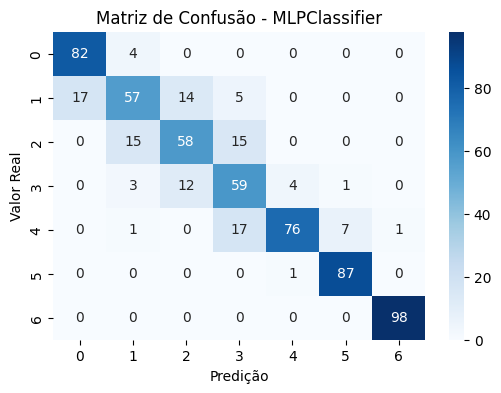

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        86
           1       0.71      0.61      0.66        93
           2       0.69      0.66      0.67        88
           3       0.61      0.75      0.67        79
           4       0.94      0.75      0.83       102
           5       0.92      0.99      0.95        88
           6       0.99      1.00      0.99        98

    accuracy                           0.82       634
   macro avg       0.81      0.82      0.81       634
weighted avg       0.82      0.82      0.81       634

AUC-ROC: 0.970416311375429


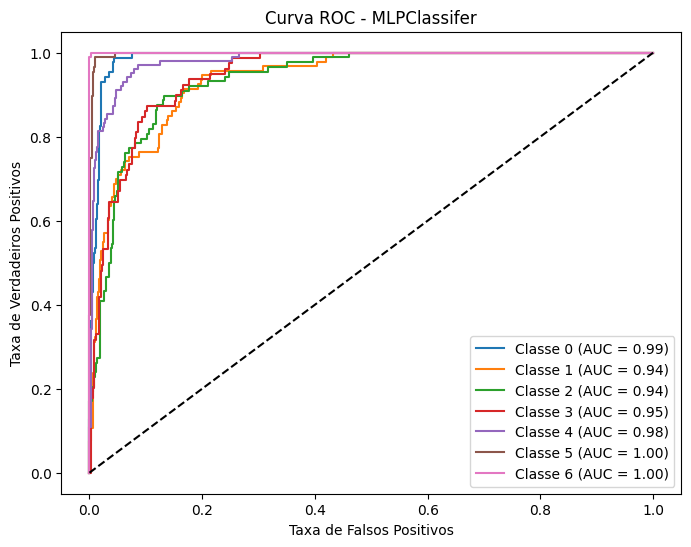

{'DecisionTreeClassifier': {'AUC-ROC': np.float64(0.9549134602015806), 'F1-score Minor Class': 0.94, 'model': DecisionTreeClassifier(random_state=42)}, 'MLPClassifier': {'AUC-ROC': np.float64(0.970416311375429), 'F1-score Minor Class': 0.9949238578680203, 'model': MLPClassifier(max_iter=500, random_state=42)}}

Resultados Comparativos entre Modelos:
MLPClassifier: AUC-ROC = 0.9704, F1-score Minor Class = 0.9949


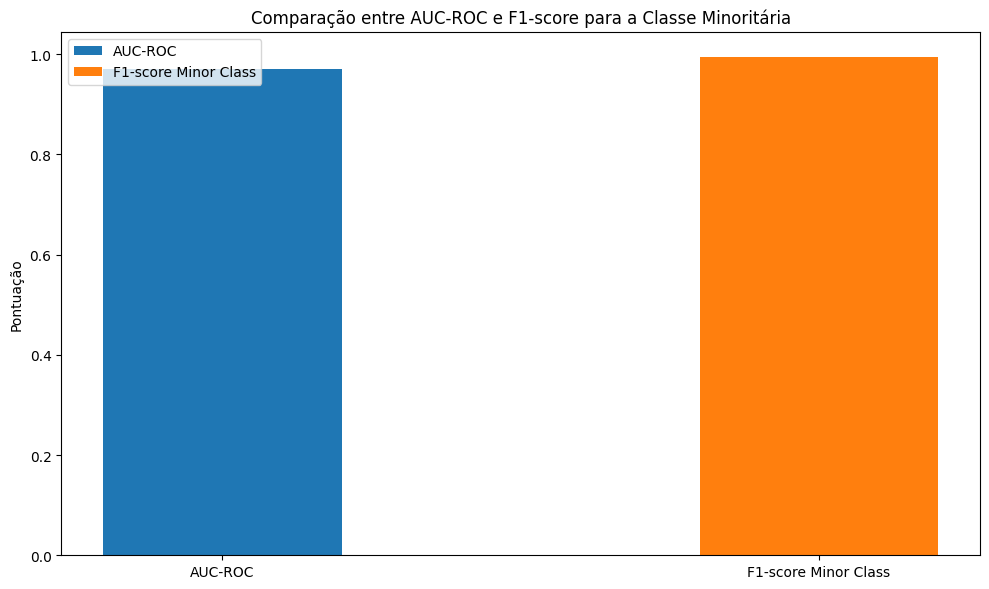

In [92]:
# Função para calcular e exibir métricas de avaliação
def evaluate_model_MLPClassifier(X, y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model.fit(X_train, y_train)

    # Predição e Probabilidades
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
    else:
        y_proba = None  # Para modelos que não suportam predict_proba

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nMétricas para {type(model).__name__}")
    print("Matriz de Confusão:")
    print(cm)

    # Gráfico da Matriz de Confusão
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel("Predição")
    plt.ylabel("Valor Real")
    plt.title(f"Matriz de Confusão - {type(model).__name__}")
    plt.show()

    # Relatório de Classificação
    print("Relatório de Classificação:")
    report = classification_report(y_test, y_pred, output_dict=True)
    print(classification_report(y_test, y_pred))

    # AUC-ROC
    if y_proba is not None:
        if len(np.unique(y)) > 2:  # Caso multiclasse
            roc_auc = roc_auc_score(y_test, y_proba, multi_class="ovr")
        else:  # Caso binário
            roc_auc = roc_auc_score(y_test, y_proba[:, 1])
        print("AUC-ROC:", roc_auc)

        # Curva ROC (apenas para o caso binário)
        if len(np.unique(y)) == 2:
            fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
            plt.figure()
            plt.plot(fpr, tpr, label="AUC-ROC Curve (AUC = {:.2f})".format(roc_auc))
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlabel("Taxa de Falsos Positivos")
            plt.ylabel("Taxa de Verdadeiros Positivos")
            plt.title(f"Curva ROC - {type(model).__name__}")
            plt.legend(loc="lower right")
            plt.show()
    else:
        roc_auc = None
        print("AUC-ROC não pode ser calculado, modelo não suporta probabilidades.")

    # Retornar métricas relevantes para comparação
    f1_minor_class = report[str(np.unique(y)[-1])]["f1-score"]  # F1-score para a última classe

    # Armazena o modelo em um arquivo .pkl
    joblib.dump(model, 'MLP_classifier_model.pkl')

    # Curva ROC do Comitê
    plot_roc_curve(y_test, y_proba, title="Curva ROC - MLPClassifer")

    return roc_auc, f1_minor_class, model

# Função para plotar a curva ROC para binário ou multiclasse
def plot_roc_curve(y_test, y_proba, title):
    n_classes = len(np.unique(y_test))
    
    plt.figure(figsize=(8, 6))
    if n_classes == 2:  # Problema binário
        fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])  # Para binário, usamos a probabilidade da classe 1
        roc_auc = roc_auc_score(y_test, y_proba[:, 1])
        plt.plot(fpr, tpr, label="AUC = {:.2f}".format(roc_auc))
    else:  # Problema multiclasse
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # Binarizar os rótulos
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
            roc_auc = roc_auc_score(y_test_bin[:, i], y_proba[:, i], multi_class="ovr")
            plt.plot(fpr, tpr, label=f"Classe {i} (AUC = {roc_auc:.2f})")
    
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("Taxa de Falsos Positivos")
    plt.ylabel("Taxa de Verdadeiros Positivos")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Definir parâmetros e realizar GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 100), (150, 150)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'alpha': [0.0001, 0.001, 0.01]
}

grid_search = GridSearchCV(MLPClassifier(random_state=42), param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_res, y_res)

# Melhor modelo encontrado
best_model = grid_search.best_estimator_
print(f"Melhor modelo encontrado: {best_model}")

# Avaliar o modelo
roc_auc, f1_score_minor, fitted_model =  evaluate_model_MLPClassifier(X, y, MLPClassifier(max_iter=500, random_state=42))

results["MLPClassifier"] = {
    "AUC-ROC": roc_auc,
    "F1-score Minor Class": f1_score_minor,
    "model": fitted_model
}
print(results)

# Exibir resultados comparativos
print("\nResultados Comparativos entre Modelos:")
print(f"MLPClassifier: AUC-ROC = {roc_auc:.4f}, F1-score Minor Class = {f1_score_minor:.4f}")

# Gráfico Comparativo dos Resultados
plt.figure(figsize=(10, 6))
plt.bar([0], [roc_auc], width=0.4, label='AUC-ROC', align='center')
plt.bar([1], [f1_score_minor], width=0.4, label='F1-score Minor Class', align='center')
plt.xticks([0, 1], ['AUC-ROC', 'F1-score Minor Class'])
plt.ylabel("Pontuação")
plt.title("Comparação entre AUC-ROC e F1-score para a Classe Minoritária")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

c:\Users\João P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Métricas para LogisticRegression
Matriz de Confusão:
[[ 94   3   0   0   0   0   0]
 [ 21  71  21   4   0   0   0]
 [  0   7  74  22   4   0   0]
 [  0   1  11  75  14   4   0]
 [  0   0   2  12  74  11   2]
 [  0   0   0   0   1 104   0]
 [  0   0   0   0   0   0 106]]


c:\Users\João P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


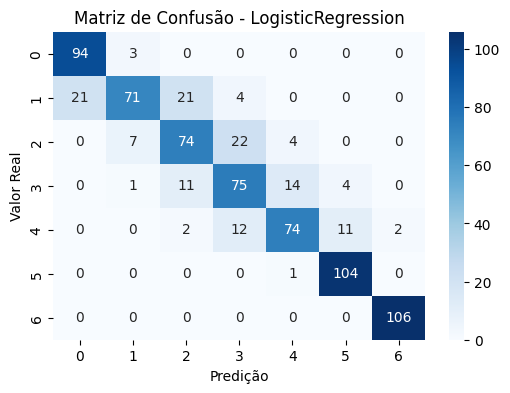

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        97
           1       0.87      0.61      0.71       117
           2       0.69      0.69      0.69       107
           3       0.66      0.71      0.69       105
           4       0.80      0.73      0.76       101
           5       0.87      0.99      0.93       105
           6       0.98      1.00      0.99       106

    accuracy                           0.81       738
   macro avg       0.81      0.81      0.81       738
weighted avg       0.81      0.81      0.81       738


Métricas para DecisionTreeClassifier
Matriz de Confusão:
[[ 94   3   0   0   0   0   0]
 [  9 101   7   0   0   0   0]
 [  0  12  91   4   0   0   0]
 [  0   0   6  92   5   2   0]
 [  0   1   0   5  93   2   0]
 [  0   0   0   0   2 103   0]
 [  0   0   0   0   0   0 106]]


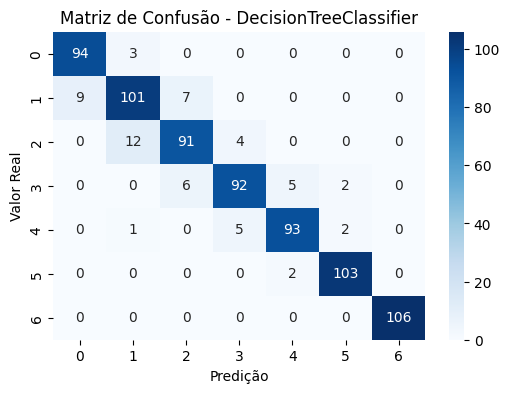

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        97
           1       0.86      0.86      0.86       117
           2       0.88      0.85      0.86       107
           3       0.91      0.88      0.89       105
           4       0.93      0.92      0.93       101
           5       0.96      0.98      0.97       105
           6       1.00      1.00      1.00       106

    accuracy                           0.92       738
   macro avg       0.92      0.92      0.92       738
weighted avg       0.92      0.92      0.92       738


Métricas para MLPClassifier
Matriz de Confusão:
[[ 95   2   0   0   0   0   0]
 [ 20  65  26   6   0   0   0]
 [  0   4  86  11   6   0   0]
 [  0   2  14  75  14   0   0]
 [  0   0   2   7  89   3   0]
 [  0   0   0   0   5 100   0]
 [  0   0   0   0   0   0 106]]


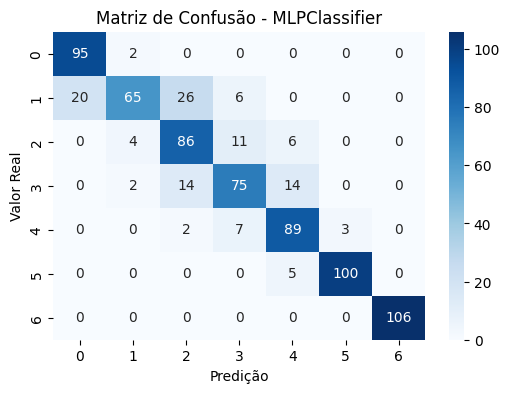

              precision    recall  f1-score   support

           0       0.83      0.98      0.90        97
           1       0.89      0.56      0.68       117
           2       0.67      0.80      0.73       107
           3       0.76      0.71      0.74       105
           4       0.78      0.88      0.83       101
           5       0.97      0.95      0.96       105
           6       1.00      1.00      1.00       106

    accuracy                           0.83       738
   macro avg       0.84      0.84      0.83       738
weighted avg       0.84      0.83      0.83       738


Matriz de Confusão do Comitê de Classificação:
[[ 93   4   0   0   0   0   0]
 [ 12  97   6   2   0   0   0]
 [  0  11  90   6   0   0   0]
 [  0   1   5  92   6   1   0]
 [  0   0   1   4  94   2   0]
 [  0   0   0   0   2 103   0]
 [  0   0   0   0   0   0 106]]


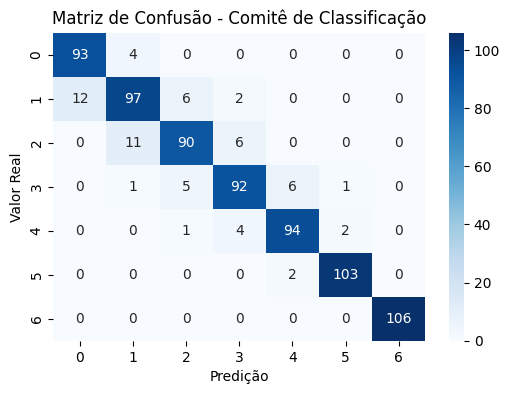

Relatório de Classificação do Comitê:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        97
           1       0.86      0.83      0.84       117
           2       0.88      0.84      0.86       107
           3       0.88      0.88      0.88       105
           4       0.92      0.93      0.93       101
           5       0.97      0.98      0.98       105
           6       1.00      1.00      1.00       106

    accuracy                           0.91       738
   macro avg       0.91      0.92      0.92       738
weighted avg       0.91      0.91      0.91       738



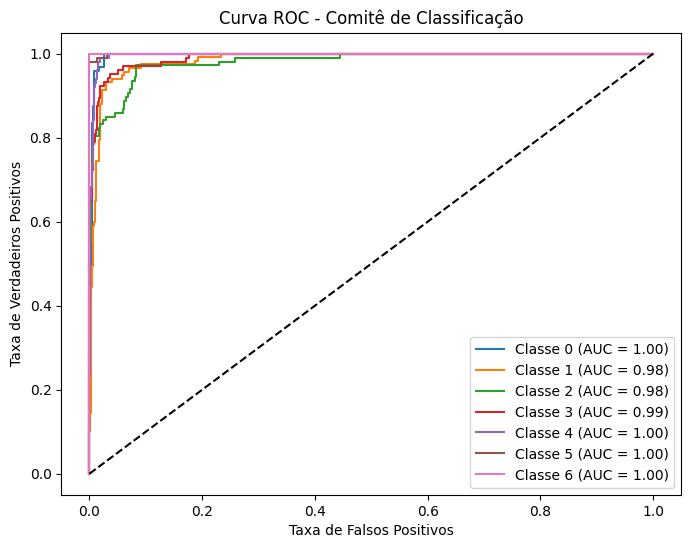

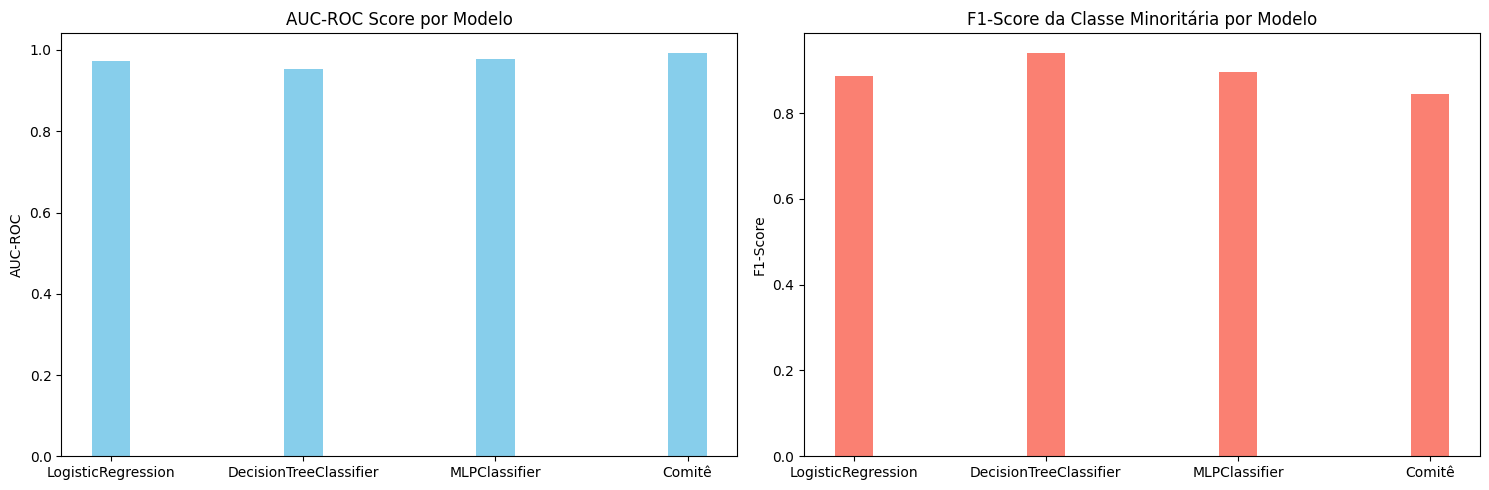


Resultados Comparativos entre Modelos:
Comitê: AUC-ROC = 0.9704, F1-score Minor Class = 0.9949
Modelo LogisticRegression:
Peso: 0.33465717513008636
AUC-ROC: 0.9719, F1-score Minor Class: 0.8868
Modelo DecisionTreeClassifier:
Peso: 0.32848950371497815
AUC-ROC: 0.9540, F1-score Minor Class: 0.9400
Modelo MLPClassifier:
Peso: 0.3368533211549355
AUC-ROC: 0.9783, F1-score Minor Class: 0.8962
    Índice  Classe Esperada  Classe Predita
0      719                0               0
1      785                2               2
2     1606                5               5
3      867                2               2
4     1084                3               4
..     ...              ...             ...
95     387                4               4
96    1448                4               4
97     367                2               1
98    1023                3               3
99    1602                5               5

[100 rows x 3 columns]


In [ ]:
# Função para calcular e exibir métricas de avaliação
def evaluate_model_comite(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)  # Aqui pegamos todas as probabilidades das classes
    
    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nMétricas para {type(model).__name__}")
    print("Matriz de Confusão:")
    print(cm)
    
    # Visualizando a Matriz de Confusão
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predição")
    plt.ylabel("Valor Real")
    plt.title(f"Matriz de Confusão - {type(model).__name__}")
    plt.show()
    
    # Relatório de Classificação
    report = classification_report(y_test, y_pred, output_dict=True)
    print(classification_report(y_test, y_pred))
    
    # AUC-ROC
    n_classes = len(np.unique(y_test))
    if n_classes == 2:  # Problema binário
        if y_proba.shape[1] > 1:
            roc_auc = roc_auc_score(y_test, y_proba[:, 1])  # Para binário, pegamos a coluna de classe 1
        else:
            roc_auc = roc_auc_score(y_test, y_proba)  # Caso haja apenas uma coluna
    else:  # Problema multiclasse
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # Binarizar os rótulos
        roc_auc = roc_auc_score(y_test_bin, y_proba, multi_class="ovr", average="weighted")
    
    # F1-score para a classe minoritária
    f1_minor_class = report[str(np.min(y_test))]["f1-score"]
    
    return {
        "model": model,
        "y_pred": y_pred,
        "y_proba": y_proba,
        "roc_auc": roc_auc,
        "f1_score_minor": f1_minor_class
    }

# Função para plotar a curva ROC para binário ou multiclasse
def plot_roc_curve(y_test, y_proba, title):
    n_classes = len(np.unique(y_test))
    
    plt.figure(figsize=(8, 6))
    if n_classes == 2:  # Problema binário
        fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])  # Para binário, usamos a probabilidade da classe 1
        roc_auc = roc_auc_score(y_test, y_proba[:, 1])
        plt.plot(fpr, tpr, label="AUC = {:.2f}".format(roc_auc))
    else:  # Problema multiclasse
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # Binarizar os rótulos
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
            roc_auc = roc_auc_score(y_test_bin[:, i], y_proba[:, i], multi_class="ovr")
            plt.plot(fpr, tpr, label=f"Classe {i} (AUC = {roc_auc:.2f})")
    
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("Taxa de Falsos Positivos")
    plt.ylabel("Taxa de Verdadeiros Positivos")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Função para calcular as predições ponderadas
def calculate_weighted_predictions(results, X_test):
    final_proba = np.zeros((len(X_test), len(np.unique(y_test))))  # Ajustar para múltiplas classes
    for result in results:
        model = result["model"]
        weight = result["roc_auc"] / sum([r["roc_auc"] for r in results])
        proba = model.predict_proba(X_test)
        final_proba += weight * proba
    final_pred = np.argmax(final_proba, axis=1)  # Para multiclasse, usamos o índice da classe com maior probabilidade
    return final_proba, final_pred

# Carregar os modelos salvos
model_log_reg = joblib.load('logistic_regression_model.pkl')
model_tree = joblib.load('decision_tree_model.pkl')
model_mlp = joblib.load('MLP_classifier_model.pkl')

# Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Modelos a serem usados no comitê
models = [model_log_reg, model_tree, model_mlp]

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Avaliar cada modelo e armazenar os resultados
results = [evaluate_model_comite(X_train, y_train, X_test, y_test, model) for model in models]

# Predições ponderadas do comitê
final_proba, final_pred = calculate_weighted_predictions(results, X_test)

# Matriz de Confusão do Comitê
cm = confusion_matrix(y_test, final_pred)
print("\nMatriz de Confusão do Comitê de Classificação:")
print(cm)

# Gráfico da Matriz de Confusão do Comitê
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predição")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusão - Comitê de Classificação")
plt.show()

# Relatório de Classificação do Comitê
print("Relatório de Classificação do Comitê:")
print(classification_report(y_test, final_pred))

# Curva ROC do Comitê
plot_roc_curve(y_test, final_proba, title="Curva ROC - Comitê de Classificação")

# Gráfico Comparativo dos Resultados
model_names = [type(result["model"]).__name__ for result in results] + ["Comitê"]

# AUC-ROC: Adicionando a AUC do comitê corretamente
if final_proba.shape[1] > 1:
    auc_scores = [result["roc_auc"] for result in results] + [roc_auc_score(y_test, final_proba, multi_class="ovr")]
else:
    auc_scores = [result["roc_auc"] for result in results] + [roc_auc_score(y_test, final_proba[:, 0])]  # Para binário

# F1-Score: Adicionando o F1-score do comitê corretamente
f1_scores = [result["f1_score_minor"] for result in results] + [classification_report(y_test, final_pred, output_dict=True)["1"]["f1-score"]]

# Definindo a largura das barras
bar_width = 0.2

# Exibindo os gráficos
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.bar(model_names, auc_scores, color='skyblue', width=bar_width)
plt.title('AUC-ROC Score por Modelo')
plt.ylabel('AUC-ROC')
plt.subplot(1, 2, 2)
plt.bar(model_names, f1_scores, color='salmon', width=bar_width)
plt.title('F1-Score da Classe Minoritária por Modelo')
plt.ylabel('F1-Score')
plt.tight_layout()
plt.show()

# Criar DataFrame com as classificações
classification_results = pd.DataFrame({
    "Índice": X_test.index,
    "Classe Esperada": y_test.values,
    "Classe Predita": final_pred
})

# Exibir resultados comparativos
print("\nResultados Comparativos entre Modelos:")
print(f"Comitê: AUC-ROC = {roc_auc:.4f}, F1-score Minor Class = {f1_score_minor:.4f}")

for i, result in enumerate(results):
    print(f"Modelo {type(result['model']).__name__}:")
    print(f"Peso: {result['roc_auc'] / sum([r['roc_auc'] for r in results])}")
    print(f"AUC-ROC: {result['roc_auc']:.4f}, F1-score Minor Class: {result['f1_score_minor']:.4f}")


# Exibir as primeiras linhas dos resultados de classificação
print(classification_results.head(100))


In [104]:
import nbformat
from nbconvert import MarkdownExporter

# Caminhos do arquivo de entrada e saída
notebook_path = "obesidade3.2.ipynb"  # Substitua pelo nome do seu notebook
output_path = "documentacao.md"

# Abrir o notebook com o encoding correto
with open(notebook_path, encoding="utf-8") as f:
    notebook = nbformat.read(f, as_version=4)

# Converter células para Markdown
exporter = MarkdownExporter()
body, _ = exporter.from_notebook_node(notebook)

# Salvar o relatório gerado
with open(output_path, "w", encoding="utf-8") as f:
    f.write(body)

print(f"Documentação salva em: {output_path}")


Documentação salva em: documentacao.md
